In [1]:
from utility_dfcutter import *

In [4]:
selection = 'emu_tau'
mctt = DFCutter(selection,nbjet='>=0',name='mctt',njet='>=0').getDataFrame(variation="")
mct  = DFCutter(selection,nbjet='>=0',name='mct',njet='>=0').getDataFrame(variation="")
mcw  = DFCutter(selection,nbjet='>=0',name='mcw',njet='>=0').getDataFrame(variation="")
mcz  = DFCutter(selection,nbjet='>=0',name='mcz',njet='>=0').getDataFrame(variation="")
mcvv = DFCutter(selection,nbjet='>=0',name='mcdiboson',njet='>=0').getDataFrame(variation="")
data = DFCutter(selection,nbjet='>=0',name="data2016", njet='>=0').getDataFrame(variation="")


for df in [mcvv,mcz,mcw,mct,mctt,data]:
    df['tauPuppiChHadIsoRel'] = df.tauPuppiChHadIso/df.tauPt
    df['tauPuppiGammaIsoRel'] = df.tauPuppiGammaIso/df.tauPt
    df['tauPuppiNeuHadIsoRel'] = df.tauPuppiNeuHadIso/df.tauPt
mc   = pd.concat([mcvv,mcz,mcw,mct,mctt],ignore_index=True,sort=False)



# 1. Make data MC plots

In [5]:
from utility_dfplotter import *

def processBreakdown():
    dfList = [mcvv,mcz,mcw,mct,mctt,data]

    sk = ASingleKinematicPlot(v,a,b,step,dfList)
    sk.settingPlot(xl,
                   ['VV',"Z","W","tW","tt","data"], 
                   ["#e0301e", "#eb8c00", "#49feec", "deepskyblue", "mediumpurple",'k'])
    sk.makePlot()
    plt.savefig('../../plots/misid/{}/{}_process.png'.format(selection,v),dpi=300)

def flavorBreakdown():
    fq = mc.query('tauGenFlavor<4 and tauGenFlavor>0')
    fc = mc.query('tauGenFlavor==4')   
    fb = mc.query('tauGenFlavor==5')   
    fg = mc.query('tauGenFlavor==21')  
    ftau = mc.query('tauGenFlavor==15')  
    fnan = mc.query('tauGenFlavor==26 or tauGenFlavor==0')

    dfList = [fnan,fg,fq,fc,fb,ftau, data]
    sk = ASingleKinematicPlot(v,a,b,step,dfList)
    sk.settingPlot(xl ,
                   ['untag', r"$g \rightarrow \tau_h$",
                    r"$q \rightarrow \tau_h$",
                    r"$c \rightarrow \tau_h$",r"$b \rightarrow \tau_h$",
                    r"$\tau_h\rightarrow \tau_h$","data"], 
                    #["C0","C1", "C2", "C3", "C4", "C5",'k'])
                   ["#a32020","#e0301e", "#eb8c00", "#49feec", "deepskyblue", "mediumpurple",'k'])
    sk.makePlot()
    plt.savefig('../../plots/misid/{}/{}_flavor.png'.format(selection,v),dpi=300)

def decaymodeBreakdown():
    d1 = mc.query('tauDecayMode==0')
    d2 = mc.query('tauDecayMode==1')   
    d3 = mc.query('tauDecayMode==10')   

    dfList = [d1,d2,d3,data]
    sk = ASingleKinematicPlot(v,a,b,step,dfList)
    sk.settingPlot(xl,
                   [r"$\tau_h \rightarrow h^+$",
                    r"$\tau_h \rightarrow h^+h^0$",
                    r"$\tau_h \rightarrow h^+h^+h^-$",
                    "data"], 
                    ["C0","C1", "C2",'k'])
    sk.makePlot()
    plt.savefig('../../plots/misid/{}/{}_decaymode.png'.format(selection,v),dpi=300)

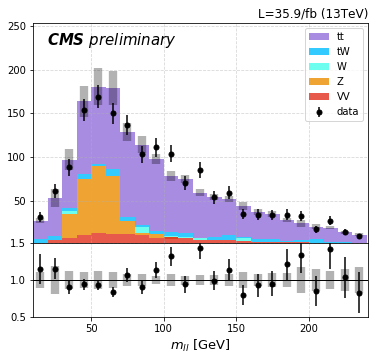

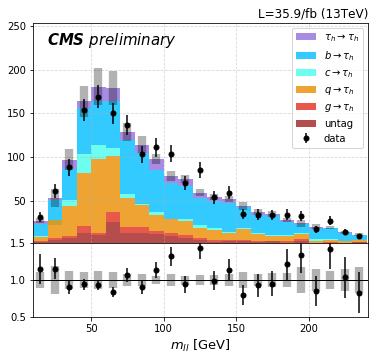

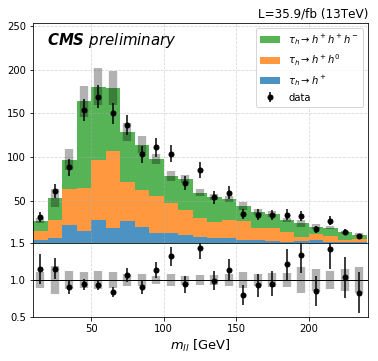

In [10]:
v,a,b,step,xl = 'tauPt',15,81,5,r'$p^T_\tau$ [GeV]'
v,a,b,step,xl = 'nBJets',0,5,1,r'$n_b$'
v,a,b,step,xl = 'nJets',0,5,1,r'$n_j$'
v,a,b,step,xl = 'dilepton_mass',10,241,10,r'$m_{ll}$ [GeV]'
# v,a,b,step,xl = 'tauPuppiChHadIsoRel',-0.05,1.5,0.1, r'$ISO^{ch}_\tau$'
# v,a,b,step,xl = 'tauPuppiGammaIsoRel',-0.05,1.5,0.1, r'$ISO^{\gamma}_\tau$'
# v,a,b,step,xl = 'tauPuppiNeuHadIsoRel',-0.05,1.5,0.1, r'$ISO^{nh}_\tau$'
 
processBreakdown()
flavorBreakdown()
decaymodeBreakdown()